# Gaussian Discriminant Analysis

### Two Different Probabilistic Approaches Towards Classsification

There are two main approaches in classification: Generative approach and discriminative approach. A generative model is used to model the joint probability of distribution, $P(X, Y)$, whereas a discriminative model is used to model $P(Y | X = x)$. 

Logically, what this means is Generative learning algorithms model the probability distribution of different classes and Discriminative learning algorithms models the boundaries between classes. 

For example, if we want to classify an animal as a dog or a cat in some population sample of dogs and cats, a Generative learning algorithms would model two probability distributions for dogs and cats based on the features of dogs and cats. And when a new example comes in, it labels that example by calculating the probability based on the two distributions and choosing the outcome that has the greatest probability. What a Discriminative learning algorithm would do in this case is calculating the outcome of some decision function and labels the new example based on that outcome. So, generative models tries to model what cats and dogs would look like and discriminative models only decide whether an example is a cat or a dog.


Logistic Regression and Support Vector Machines can be given as members of Discriminative Learning algorithms. Linear Discriminant Analysis, Quadratic Discriminant Analysis and Naive Bayes Classifier are examples of Generative Learning algorithms.

#### Remark: 
Because Generative learning algorithms models each class' population, it can be used to generate new examples whereas Discriminative learning algorithms don't have this capability.

### Gaussian Discriminant Analysis

Linear Discriminant Analysis and Quadratic Discriminant Analysis are sub-branches of Gaussian Discriminant Analysis. In Linear Discriminant Analysis, different classes share the same covariance matrix, whereas in Quadratic Discriminant Analysis all classes have different covariance matrices.

GDA (Gaussian Discriminant Analysis) assumes all features are normally distributed. Multivariate Gaussian distribution is written as: 

$$ P(x | y_i) = \frac{1}{(2\pi)^{n/2}|\Sigma_i|^{1/2}}exp{[-\frac{1}{2}(x-\mu_{y_i})^{T}\Sigma_i^{-1}(x-\mu_{y_i})]}  \tag{1}
$$

For simplicity, let us assume the response variable, $y_i$, is binary, i.e $ y_i \in \{0, 1\}$. So, $y_i$'s are Bernoulli distributed. Therefore $P(Y = y_i)$ can be written as: $$ P(Y = y_i) = \phi^{y_i}(1-\phi)^{1-y_i} \tag{2} $$


With these in mind, we can write the joint probability distribution $P(X, Y)$ as:

$$ P(X, Y) = P(X | Y = 0)P(Y = 0) + P(X | Y = 1)P(Y = 1)  \tag{3}$$

Then we can write the log-likelihood of the data as: $$ 
l(\phi, \mu_0, \mu_1, \Sigma_i) = \log\prod\limits_{i = 1}^m p(x^{(i)}, y^{(i)}; \phi, \mu_0, \mu_1, \Sigma_i) 
$$

$$ = \log\prod\limits_{i = 1}^m p(x^{(i)} | y^{(i)}; \mu_0, \mu_1, \Sigma_i)p(y^{(i)}; \phi) \tag{4} $$

#### Linear Discriminant Analysis

At this point, if we decide that each class shares the same covariance matrix, then what we do is Linear Discriminant Analysis. Reason why this is called this way is, in LDA, decision boundary between classes is linear. Covariance matrix, $\Sigma$ of a multivariate Gaussian distribution determines the orientation of the distribution. Becasue each distribution has the same covariance matrix, they become 'parallel', meaning that they have the same orientation (like lines that has the same slope). Therefore the curve that separates the two distributions, *decision boundary*, becomes linear.

![caption](files/contour_gauss1.jpg)
![caption](files/contour_gauss.jpg)

Log-likelihood of such a model is as follows (from the (6)):

$$ 
l(\phi, \mu_0, \mu_1, \Sigma) = \log\prod\limits_{i = 1}^m p(x^{(i)} | y^{(i)}; \mu_0, \mu_1, \Sigma)p(y^{(i)}; \phi) \tag{5} 
$$


$$ = \sum\limits_{i = 1}^m \log p(x^{(i)} | y^{(i)}; \mu_0, \mu_1, \Sigma) + \sum\limits_{i = 1}^m \log p(y^{(i)}; \phi) $$


$$ = \sum\limits_{i = 1}^m\log\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp{[-\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}})]} + \sum\limits_{i = 1}^m \log \phi^{y^{(i)}}(1-\phi)^{(1-y^{(i)})} $$

 
$$ = \sum\limits_{i = 1}^m\log\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} + \sum\limits_{i = 1}^m -\frac{1}{2}(x^{(i)}-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x^{(i)}-\mu_{y^{(i)}}) + \sum\limits_{i = 1}^m (y^{(i)}\log\phi + (1-y^{(i)})\log(1-\phi))  \tag{6} $$


If we maximize (6) by taking derivatives with respect to parameters $\mu_0, \mu_1, \Sigma, \phi $, we find:

$$ \phi = \frac{1}{m}\sum\limits_{i=1}^{m} 1\{y^{(i)} = 1\} $$

$$ \mu_0 = \sum\limits_{i=1}^{m} \frac{1\{y^{(i)} = 0\}x^{(i)}}{1\{y^{(i)} = 0\}} $$

$$ \mu_1 = \sum\limits_{i=1}^{m} \frac{1\{y^{(i)} = 1\}x^{(i)}}{1\{y^{(i)} = 1\}} $$

$$ \Sigma = \frac{1}{m}\sum\limits_{i=1}^{m} (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^{T} $$


When we make prediction for a new example, we use Bayes' Rule:

$$ p(x,y) = p(y|x)p(x) = p(x|y)p(y) \Rightarrow p(y|x) = \frac{p(x|y)p(y)}{p(x)} $$

To predict which class a new example should belong, we have to calculate $P(Y = y^{(i)} | X = x^{(i)})$. Then, we choose the highest probability and the corresponding class as a prediction. In a formal notation:

$$ \underset{y}{\mathrm{argmax}}  p(y|x) = \underset{y}{\mathrm{argmax}}  \frac{p(x|y)p(y)}{p(x)} = \underset{y}{\mathrm{argmax}}  p(x|y)p(y) $$

We got rid of $p(x)$ because it's the same for all classes.

Let's examine the $P(X = x | Y = y^{(i)})P(Y = y^{(i)})$:

$$ = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp{[-\frac{1}{2}(x-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x-\mu_{y^{(i)})}]}\phi^{y^{(i)}}(1-\phi)^{(1-y^{(i)})} $$

We can take the log of this equation to make things a little simpler. Because we're looking for the $y^{(i)}$ that maximizes this equation, taking the log won't change anything.

$$ \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp{[-\frac{1}{2}(x-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x-\mu_{y^{(i)})}]}\phi^{y^{(i)}}(1-\phi)^{(1-y^{(i)})} $$


$$ = \log\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} + \log exp{[-\frac{1}{2}(x-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x-\mu_{y^{(i)})}]} + \log \phi^{y^{(i)}}(1-\phi)^{(1-y^{(i)})} $$


$$ = \log\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}} -\frac{1}{2}(x-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x-\mu_{y^{(i)}}) + \log \phi^{y^{(i)}}(1-\phi)^{(1-y^{(i)})} $$


The term $\log\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}$ is constant, because it is same for all $y^{(i)}$'s, we can disregard it. Therefore, our objective function that we want to maximize, reduces to:


$$ y = \underset{y^{(i)}}{\mathrm{argmax}} (-\frac{1}{2}(x-\mu_{y^{(i)}})^{T}\Sigma^{-1}(x-\mu_{y^{(i)}}) + \log \phi^{y^{(i)}}(1-\phi)^{(1-y^{(i)})}) \tag{7} $$


#### Quadratic Discrminant Analysis

As opposed to LDA, if we decide that each class should have its own covariance matrix, then this is Quadratic Discriminant Analysis. Because each distribution has different covariance matrices, they have different orientations and different distributions fails to be linearly separable. That's why it is called 'Quadratic'. Covariance matrix of each corresponding class is calculated as:

$$ \Sigma_k = \frac{\sum\limits_{i=1}^{m} 1\{y^{(i)} = y_k \} (x^{(i)} - \mu_{y^{(i)}})(x^{(i)} - \mu_{y^{(i)}})^{T}}{\sum\limits_{i=1}^{m} 1\{y^{(i)} = y_k \}} $$

where $y_k \in \{0, 1\}$





# GDA Applications

In [6]:
import numpy as np
import pandas as pd

from GaussianDiscriminantAnalysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# Check the GaussianDiscriminantAnalysis.py for implementations

In [7]:
def train_test_split(X, ratio):
    X_shuffled = np.copy(X)
    np.random.shuffle(X_shuffled)
    return X_shuffled[:int(len(X_shuffled) * ratio)], X_shuffled[int(len(X_shuffled) * ratio):]

In [8]:
"""
    Dataset is from the UCI Machine Learning Repository
    https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
"""
df = pd.read_csv('chronic_kidney_disease.csv', header = None, error_bad_lines=False)
df.columns = [
    'age',
    'bp',
    'sp',
    'al',
    'su',
    'rbc',
    'pc',
    'pcc',
    'ba',
    'bgr',
    'bu',
    'sc',
    'sod',
    'pot',
    'hemo',
    'pcv',
    'wc',
    'rc',
    'htn',
    'dm',
    'cad',
    'appet',
    'pe',
    'ane',
    'class'
]

b'Skipping line 70: expected 25 fields, saw 26\nSkipping line 73: expected 25 fields, saw 26\nSkipping line 370: expected 25 fields, saw 26\n'


In [9]:
df

,age,bp,sp,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [332]:
df.replace({'?': np.nan}, inplace=True)
df.dropna(inplace=True)
df

,age,bp,sp,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
11,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
14,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
20,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
393,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
394,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
395,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [333]:
df['age'] = df['age'].astype('int')
df['bp'] = df['bp'].astype('int')
df['pcv'] = df['pcv'].astype('int')
df['wc'] = df['wc'].astype('int')
df['rc'] = df['rc'].astype('float')

df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes

In [334]:
df.describe()

,age,bp,pcv,wc,rc,class
count,157.000000,157.000000,157.000000,157.00000,157.000000,157.000000
mean,49.401274,74.076433,41.891720,8464.33121,4.892357,0.726115
std,15.427190,11.206421,9.128414,3133.46316,1.022600,0.447378
min,6.000000,50.000000,9.000000,3800.00000,2.100000,0.000000
25%,39.000000,60.000000,37.000000,6500.00000,4.500000,0.000000
50%,50.000000,80.000000,44.000000,7800.00000,5.000000,1.000000
75%,60.000000,80.000000,48.000000,9700.00000,5.600000,1.000000
max,83.000000,110.000000,54.000000,26400.00000,8.000000,1.000000


In [335]:
df.corr()

,age,bp,pcv,wc,rc,class
age,1.000000,0.084286,-0.242078,0.148446,-0.243401,-0.314621
bp,0.084286,1.000000,-0.352838,0.009644,-0.228845,-0.325676
pcv,-0.242078,-0.352838,1.000000,-0.351894,0.739774,0.827751
wc,0.148446,0.009644,-0.351894,1.000000,-0.272358,-0.410786
rc,-0.243401,-0.228845,0.739774,-0.272358,1.000000,0.721208
class,-0.314621,-0.325676,0.827751,-0.410786,0.721208,1.000000


In [336]:
data = df[['age', 'wc', 'rc', 'class']].values

In [337]:
train_data, test_data = train_test_split(data, ratio=0.8)

X_train = train_data[:, :3]
y_train = train_data[:, -1]

X_test = test_data[:, :3]
y_test = test_data[:, -1]

In [338]:
model_linear = LinearDiscriminantAnalysis()
model_linear.fit(X_train, y_train)

In [339]:
y_pred = model_linear.predict(X_test)

In [340]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [341]:
y_test[y_test==0].size, y_pred[y_pred == 0].size

(10, 9)

In [342]:
y_test[y_test==1].size, y_pred[y_pred == 1].size

(22, 23)

In [343]:
y_test[y_test == y_pred].size / y_test.size

0.96875

In [344]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, y_train)

In [345]:
y_pred = model_quad.predict(X_test)

In [346]:
y_test[y_test==0].size, y_pred[y_pred == 0].size

(10, 10)

In [347]:
y_test[y_test==1].size, y_pred[y_pred == 1].size

(22, 22)

In [348]:
y_test[y_test == y_pred].size / y_test.size

1.0

In [10]:
"""
    Dataset is from the UCI Machine Learning Repository
    https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
"""
df_exam = pd.read_excel('exam_data_.xls')
df_exam

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,High
254,0.78,0.61,0.71,0.19,0.60,Middle
255,0.54,0.82,0.71,0.29,0.77,High
256,0.50,0.75,0.81,0.61,0.26,Middle


In [11]:
df_exam.columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']

In [12]:
df_exam['UNS'] = df_exam['UNS'].astype('category')
df_exam['UNS'] = df_exam['UNS'].cat.codes

In [16]:
df_exam.corr()

,STG,SCG,STR,LPR,PEG,UNS
STG,1.000000,0.081035,0.040841,0.099543,0.206359,-0.074570
SCG,0.081035,1.000000,0.083732,0.097816,0.182792,-0.210050
STR,0.040841,0.083732,1.000000,0.036481,0.120779,-0.060510
LPR,0.099543,0.097816,0.036481,1.000000,-0.269574,-0.263670
PEG,0.206359,0.182792,0.120779,-0.269574,1.000000,-0.488249
UNS,-0.074570,-0.210050,-0.060510,-0.263670,-0.488249,1.000000


In [353]:
data = df_exam[['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS']].values

train_data, test_data = train_test_split(data, ratio=0.8)

X_train = train_data[:, :-1]
y_train = train_data[:, -1]

X_test = test_data[:, :-1]
y_test = test_data[:, -1]

GDA makes stronger modeling assumptions about the data than does logistic regression. It turns out that when these modeling assumptions are correct, then GDA will find better fits to the data, and is a better model. Specifically, when $p(x|y)$ is indeed gaussian (with shared Σ), then GDA is asymptotically efficient.
If we see the distributions of $p(x|y)$ for all classes for y, we will have a better perspective.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


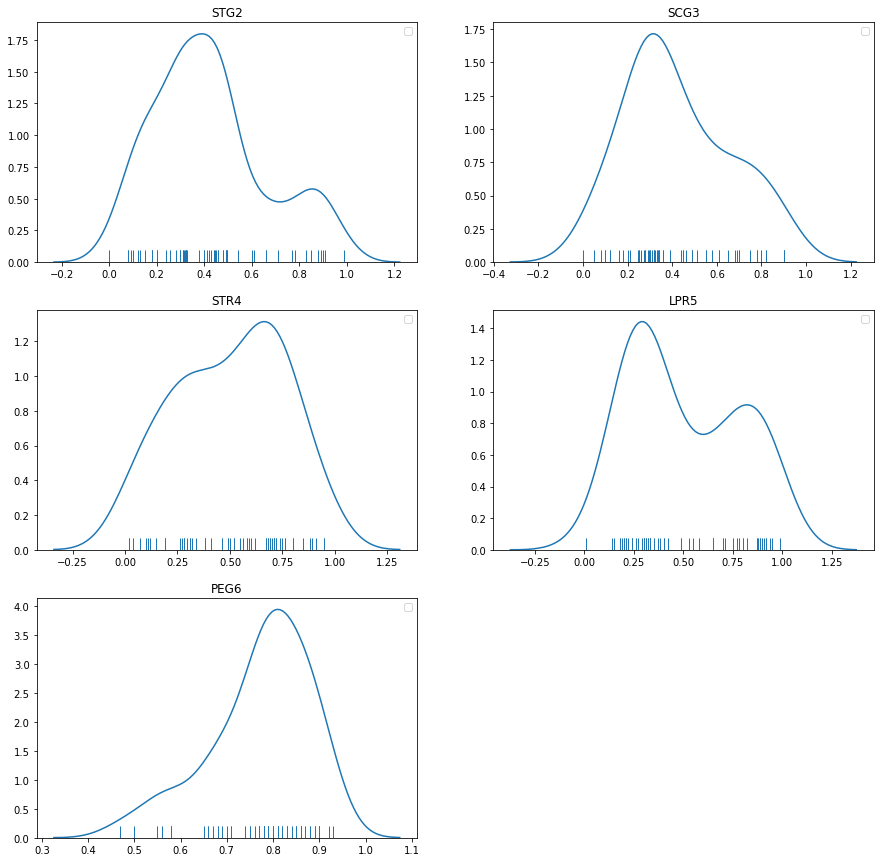

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


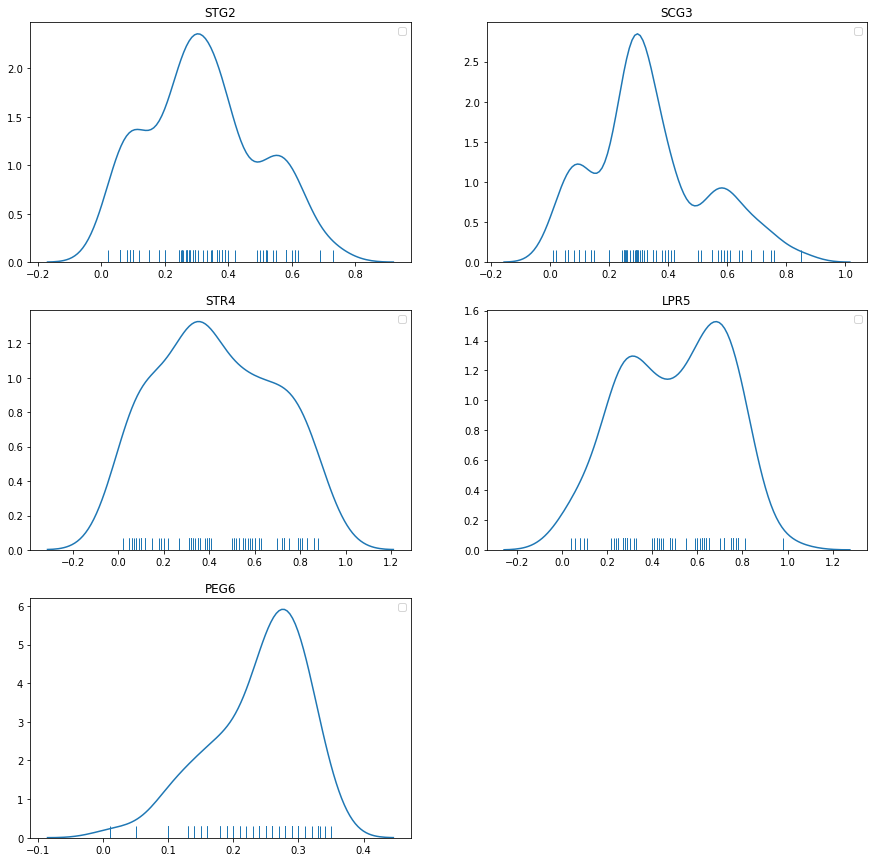

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


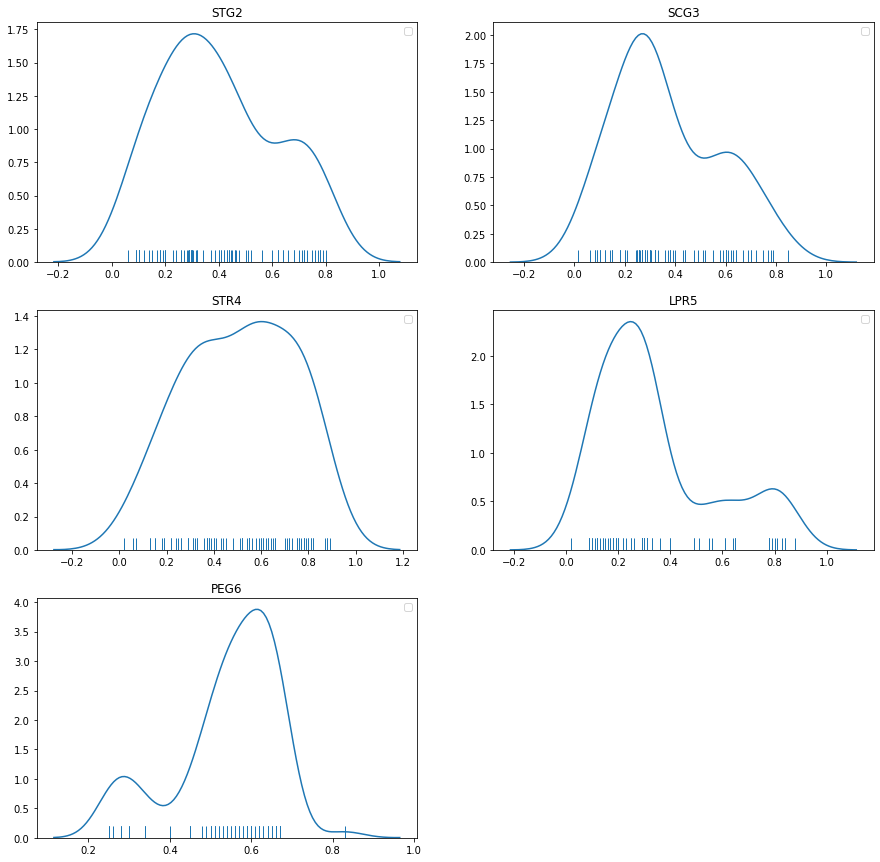

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


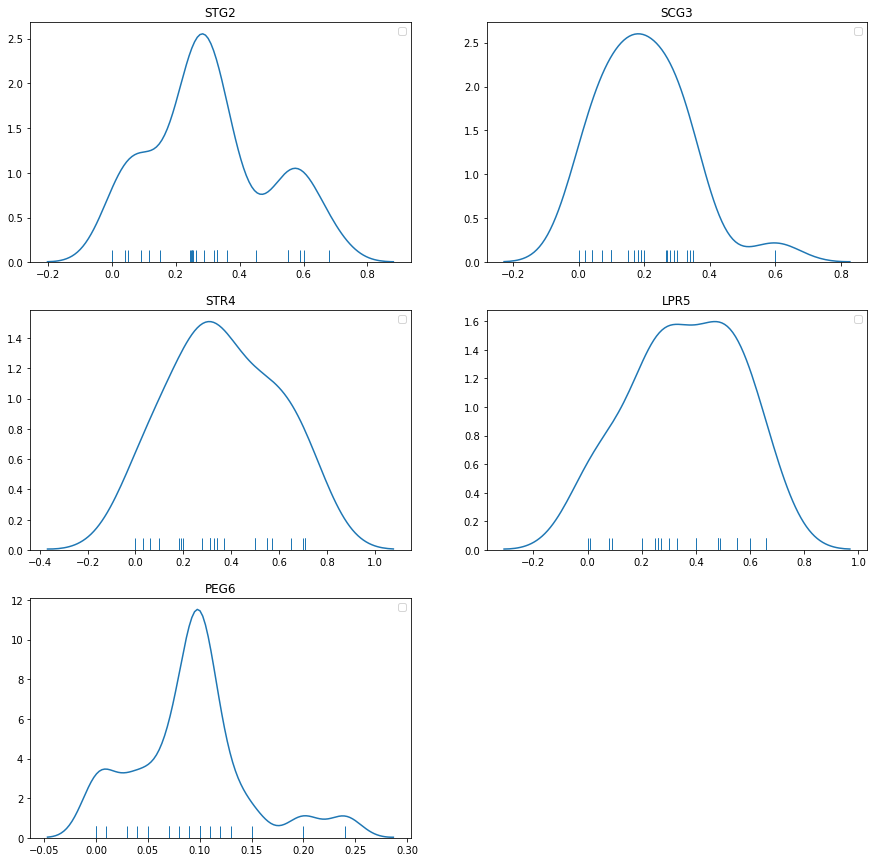

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
pxydf = {}
pxydf[3] = df_exam[df_exam['UNS'] == 3]
del pxydf[3]['UNS']
pxydf[2] = df_exam[df_exam['UNS']== 2]
del pxydf[2]['UNS']
pxydf[1] = df_exam[df_exam['UNS']== 1]
del pxydf[1]['UNS']
pxydf[0] = df_exam[df_exam['UNS']== 0]
del pxydf[0]['UNS']

for j in range(len(pxydf)): 
    i=1
    fig = plt.figure(figsize=(15,15))
    for columns in pxydf[i].columns:
        fig.add_subplot(3,2,i)
        i = i+1
        fig.set_figheight(15)
        fig.set_figwidth(15)
        sns.distplot(pxydf[j][[columns]], hist=False, rug=True)
        plt.title(columns+str(i))
        plt.legend()
    plt.show()

In [354]:
model_exam = LinearDiscriminantAnalysis()
model_exam.fit(X_train, y_train)

In [355]:
y_pred = model_exam.predict(X_test)

In [356]:
y_test[y_pred == y_test].size / y_test.size

0.9423076923076923

In [357]:
model_quad = QuadraticDiscriminantAnalysis()
model_quad.fit(X_train, y_train)

In [358]:
y_pred = model_quad.predict(X_test)

In [359]:
y_test[y_test == y_pred].size / y_test.size

0.9423076923076923